In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from math import sqrt

from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
done = pd.read_csv('https://raw.githubusercontent.com/cs575ts/Assignments/main/Assignment_4/Electric_Production.csv')


In [3]:
d1 = pd.DataFrame(done)
d1

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [4]:
dtwo = pd.read_csv('https://raw.githubusercontent.com/cs575ts/Assignments/main/Assignment_4/jj.csv')

In [5]:
d2 = pd.DataFrame(dtwo)
d2

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61
...,...,...
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02


# Dataset 1

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(d1['IPG2211A2N'].values)
print('ADF Statistics: ',result[0])
print('p-value: ', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(key, value)

if result[0] < result[4]["5%"]:
    print ("Time Series is Stationary")
   
else:
    print ("Time Series is Non-Stationary")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF Statistics:  -2.256990350047245
p-value:  0.1862146911658677
Critical Values:
1% -3.4476305904172904
5% -2.869155980820355
10% -2.570827146203181
Time Series is Non-Stationary


In [ ]:
from statsmodels.tsa.stattools import kpss
result = kpss(d1['IPG2211A2N'].values)
print('KPSS Statistics: ',result[0])
print('p-value: ', result[1])
print('Critical Values:')
for key, value in result[3].items():
    print(key, value)

if result[0] > result[3]["5%"]:
    print ("Time Series is not Stationary")
else:
    print ("Time Series is Stationary")

KPSS Statistics:  2.2061923297520734
p-value:  0.01
Critical Values:
10% 0.347
5% 0.463
2.5% 0.574
1% 0.739
Time Series is not Stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


since both values showing not stationary, applying differncing to make it stationary

In [6]:
d1['diffe']= d1['IPG2211A2N'].diff(periods=1)

diff1 = d1['diffe'][1:]
diff1 = pd.DataFrame(diff1,columns=['diffe'])
diff1


,diffe
1,-1.8332
2,-8.2218
3,-4.9788
4,-2.1563
5,2.7753
...,...
392,-10.3158
393,-5.0017
394,3.7222
395,17.3853


checking again

In [ ]:
result = adfuller(diff1['diffe'].values)
print('ADF Statistics: ',result[0])
print('p-value: ', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(key, value)

if result[0] < result[4]["5%"]:
    print ("Time Series is Stationary")
   
else:
    print ("Time Series is Non-Stationary")

ADF Statistics:  -7.104890882267334
p-value:  4.0777865655388604e-10
Critical Values:
1% -3.4476305904172904
5% -2.869155980820355
10% -2.570827146203181
Time Series is Stationary


In [ ]:
result = kpss(diff1['diffe'].values)
print('KPSS Statistics: ',result[0])
print('p-value: ', result[1])
print('Critical Values:')
for key, value in result[3].items():
    print(key, value)

if result[0] > result[3]["5%"]:
    print ("Time Series is not Stationary")
else:
    print ("Time Series is Stationary")

KPSS Statistics:  0.14590694451006375
p-value:  0.1
Critical Values:
10% 0.347
5% 0.463
2.5% 0.574
1% 0.739
Time Series is Stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


now the time series is stationary

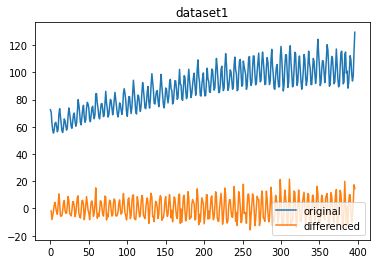

In [9]:
plt.title('dataset1')

plt.plot(d1['IPG2211A2N'])

plt.plot(diff1['diffe'])
plt.legend(["original", "differenced"], loc ="lower right") 

In [7]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

acf and pacf of original series

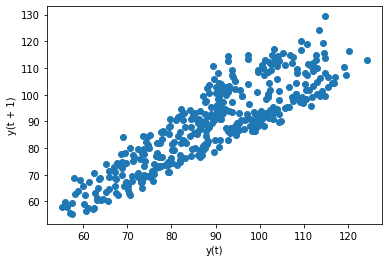

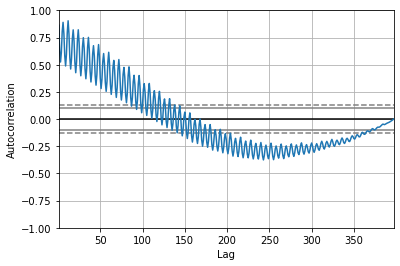

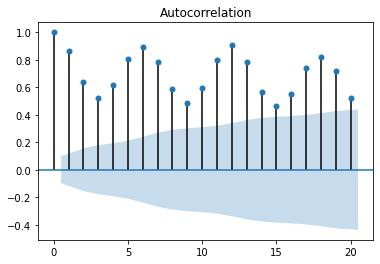

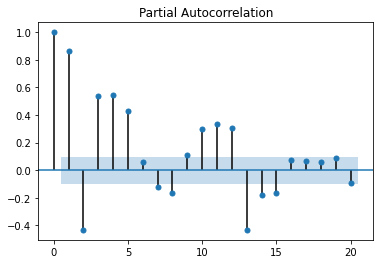

In [41]:
lag_plot(d1['IPG2211A2N'])
pyplot.show()
autocorrelation_plot(d1['IPG2211A2N'])
pyplot.show()
plot_acf(d1['IPG2211A2N'],lags = 20)
pyplot.show()
plot_pacf(d1['IPG2211A2N'],lags = 20)
pyplot.show()


acf and pacf of differnced series

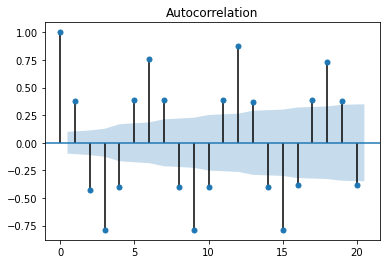

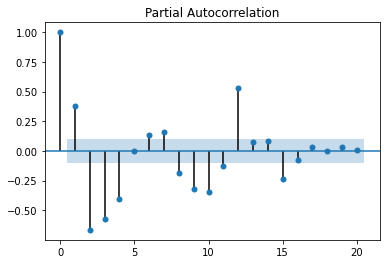

In [42]:
plot_acf(diff1['diffe'],lags=20)
pyplot.show()
plot_pacf(diff1['diffe'],lags = 20)
pyplot.show()

the repition of pattern in acf shows there's seasonality (quarterly)

now evaluating order 

In [ ]:
def eval_arima_model(dataset,order):
  
  train_size = int(len(dataset)*0.65)
  train,test = dataset[0:train_size],dataset[train_size:]
  history = [x for x in train]
  preds = []
  for b in range(len(test)):
    model = ARIMA(history,order = order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    preds.append(yhat)
    history.append(test[b])

  mse = mean_squared_error(test,preds)
  rmse = sqrt(mean_squared_error(test,preds))

  return mse,rmse



def eval_models(dataset,pvals,dvals,qvals):
  dataset = dataset.astype("float32")
  best_mse,best_rmse,best_params = float("inf"),float("inf"),None
  for p in pvals:
    for d in dvals:
      for q in qvals:
        order = (p,d,q)
        try:
          mse,rmse = eval_arima_model(dataset,order)
          if mse < best_mse:
            best_mse,best_params = mse,order
          if rmse < best_rmse:
            best_rmse = rmse
          print('ARIMA%s MSE=%.3f RMSE=%.3f' % (order,mse,rmse))
        except:
          continue
  #print('BEST ARIMA%s MSE=%.3f RMSE=%.3f' % (order,best_mse,best_rmse))

        





In [ ]:
pvals = range(4,11)
dvals = range(0, 3)
qvals = range(4,11)
warnings.filterwarnings("ignore")
eval_models(diff1['diffe'].values, pvals, dvals,qvals)

ARIMA(4, 0, 4) MSE=14.370 RMSE=3.791
ARIMA(4, 0, 5) MSE=14.523 RMSE=3.811
ARIMA(4, 0, 6) MSE=15.184 RMSE=3.897
ARIMA(4, 0, 7) MSE=15.078 RMSE=3.883
ARIMA(4, 0, 8) MSE=15.042 RMSE=3.878
ARIMA(4, 0, 9) MSE=14.446 RMSE=3.801
ARIMA(4, 0, 10) MSE=13.398 RMSE=3.660
ARIMA(4, 1, 4) MSE=19.218 RMSE=4.384
ARIMA(4, 1, 5) MSE=14.366 RMSE=3.790
ARIMA(4, 1, 6) MSE=14.310 RMSE=3.783
ARIMA(4, 1, 7) MSE=13.352 RMSE=3.654
ARIMA(4, 1, 8) MSE=13.389 RMSE=3.659
ARIMA(4, 1, 9) MSE=13.996 RMSE=3.741
ARIMA(4, 1, 10) MSE=12.511 RMSE=3.537
ARIMA(4, 2, 4) MSE=22.684 RMSE=4.763
ARIMA(4, 2, 5) MSE=26.671 RMSE=5.164
ARIMA(4, 2, 6) MSE=17.455 RMSE=4.178
ARIMA(4, 2, 7) MSE=14.291 RMSE=3.780
ARIMA(4, 2, 8) MSE=15.561 RMSE=3.945
ARIMA(4, 2, 9) MSE=16.399 RMSE=4.050
ARIMA(4, 2, 10) MSE=15.957 RMSE=3.995
ARIMA(5, 0, 5) MSE=14.871 RMSE=3.856
ARIMA(5, 0, 6) MSE=13.768 RMSE=3.710
ARIMA(5, 0, 7) MSE=14.577 RMSE=3.818
ARIMA(5, 0, 8) MSE=13.781 RMSE=3.712
ARIMA(5, 0, 9) MSE=13.222 RMSE=3.636
ARIMA(5, 0, 10) MSE=13.660 RMSE=3.6

least mse for ARIMA (6,1,10)

<Figure size 432x288 with 0 Axes>

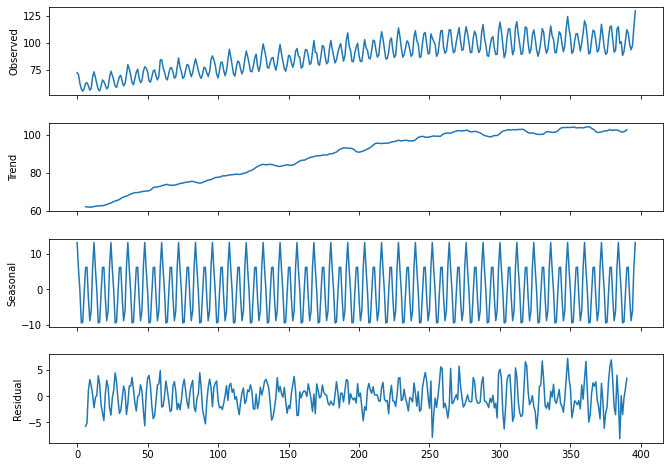

In [ ]:
result = seasonal_decompose(d1['IPG2211A2N'], model='additive', freq=12)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(10,7)

this shows seasonality

plotting ar,ma,arma,arima,sarima

Test MSE: 19.155
Test RMSE: 4.377
Test R2SCORE: 0.784


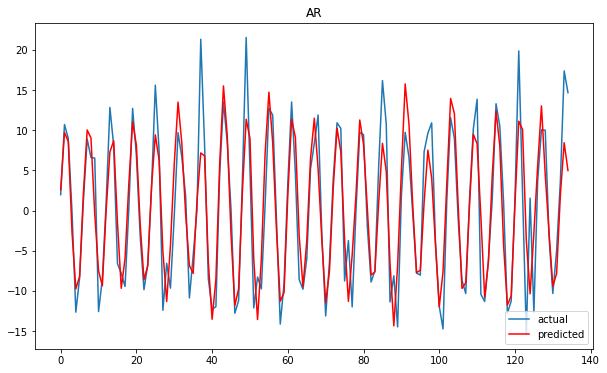

In [43]:
X = diff1['diffe'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
preds = []

for t in range(len(test)):
	model = ARIMA(history, order=(6,0,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	preds.append(yhat)
	obs = test[t]
	history.append(obs)


rmse = sqrt(mean_squared_error(test, preds))
mse = mean_squared_error(test,preds)
r2score = r2_score(test,preds)
print('Test MSE: %.3f' % mse)
print('Test RMSE: %.3f' % rmse)
print('Test R2SCORE: %.3f' % r2score)
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
pyplot.plot(test,label = 'actual')
pyplot.plot(preds, color='red',label = 'predicted')

   
ax.legend(loc='lower right')
plt.title('AR')

pyplot.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: 

Test MSE: 25.826
Test RMSE: 5.082
Test R2SCORE: 0.709


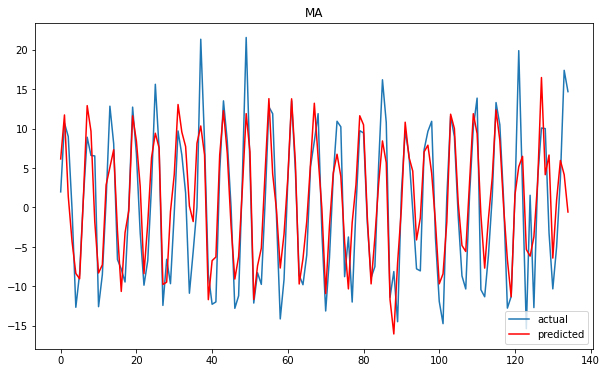

In [45]:
X = diff1['diffe'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
preds = []
for t in range(len(test)):
	model = ARIMA(history, order=(0,0,10))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	preds.append(yhat)
	obs = test[t]
	history.append(obs)


rmse = sqrt(mean_squared_error(test, preds))
mse = mean_squared_error(test,preds)
r2score = r2_score(test,preds)
print('Test MSE: %.3f' % mse)
print('Test RMSE: %.3f' % rmse)
print('Test R2SCORE: %.3f' % r2score)

fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
pyplot.plot(test,label = 'actual')
pyplot.plot(preds, color='red',label = 'predicted')

   
ax.legend(loc='lower right')
plt.title('MA')

pyplot.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sta

Test MSE: 12.610
Test RMSE: 3.551
Test R2SCORE: 0.858


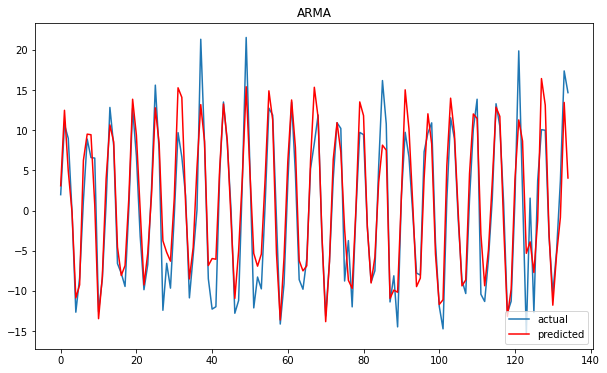

In [46]:
X = diff1['diffe'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
preds = []
for t in range(len(test)):
	model = ARIMA(history, order=(6,0,10))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	preds.append(yhat)
	obs = test[t]
	history.append(obs)


rmse = sqrt(mean_squared_error(test, preds))
mse = mean_squared_error(test,preds)
r2score = r2_score(test,preds)
print('Test MSE: %.3f' % mse)
print('Test RMSE: %.3f' % rmse)
print('Test R2SCORE: %.3f' % r2score)

fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
pyplot.plot(test,label = 'actual')
pyplot.plot(preds, color='red',label = 'predicted')

   
ax.legend(loc='lower right')
plt.title('ARMA')

pyplot.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sta

Test MSE: 12.116
Test RMSE: 3.481
Test R2SCORE: 0.864


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Text(0.5, 1.0, 'ARIMA')

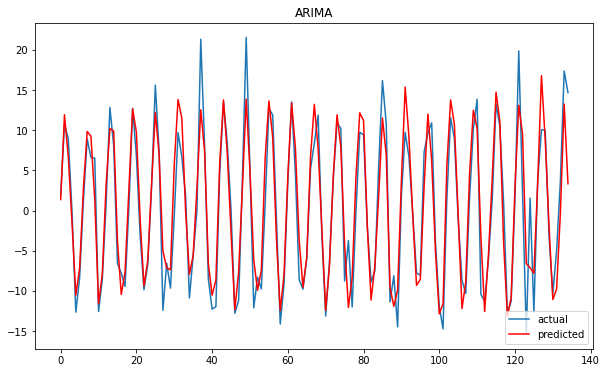

In [47]:
X = diff1['diffe'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
preds = []
for t in range(len(test)):
	model = ARIMA(history, order=(6,1,10))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	preds.append(yhat)
	obs = test[t]
	history.append(obs)


rmse = sqrt(mean_squared_error(test, preds))
mse = mean_squared_error(test,preds)
r2score = r2_score(test,preds)
print('Test MSE: %.3f' % mse)
print('Test RMSE: %.3f' % rmse)
print('Test R2SCORE: %.3f' % r2score)

fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
pyplot.plot(test,label = 'actual')
pyplot.plot(preds, color='red',label = 'predicted')

   
ax.legend(loc='lower right')
plt.title('ARIMA')

In [58]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
best_model = SARIMAX(d1['IPG2211A2N'], order=(6, 1, 2), seasonal_order=(1, 1, 2, 12)).fit(dis=-1)
print(best_model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                     SARIMAX Results                                      
Dep. Variable:                         IPG2211A2N   No. Observations:                  397
Model:             SARIMAX(6, 1, 2)x(1, 1, 2, 12)   Log Likelihood                -882.083
Date:                            Thu, 18 Mar 2021   AIC                           1788.166
Time:                                    20:07:52   BIC                           1835.574
Sample:                                         0   HQIC                          1806.970
                                            - 397                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3725      0.079     -4.718      0.000      -0.527      -0.218
ar.L2          0.4099      0.067   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


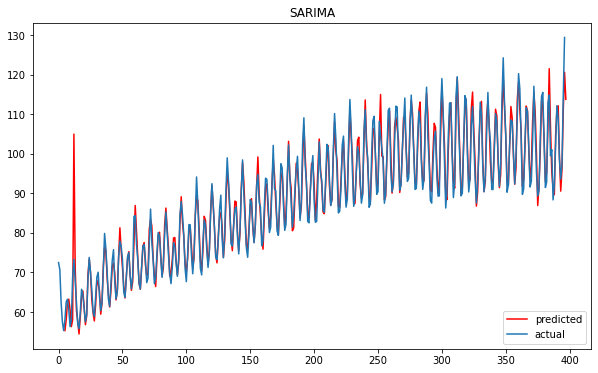

In [63]:
d1['sarima_model'] = best_model.fittedvalues
d1['sarima_model'][:4+1] = np.NaN
forecast = best_model.predict(start=d1.shape[0], end=d1.shape[0])
forecast = d1['sarima_model'].append(forecast)
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()

plt.plot(forecast, color='r', label='predicted')

plt.plot(d1['IPG2211A2N'], label='actual')
ax.legend(loc='lower right')
plt.title('SARIMA')
plt.show()


# Dataset 2

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(d2['data'].values)
print('ADF Statistics: ',result[0])
print('p-value: ', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(key, value)

if result[0] < result[4]["5%"]:
    print ("Time Series is Stationary")
   
else:
    print ("Time Series is Non-Stationary")

ADF Statistics:  2.7420165734574784
p-value:  1.0
Critical Values:
1% -3.524624466842421
5% -2.9026070739026064
10% -2.5886785262345677
Time Series is Non-Stationary


In [ ]:
from statsmodels.tsa.stattools import kpss
result = kpss(d2['data'].values)
print('KPSS Statistics: ',result[0])
print('p-value: ', result[1])
print('Critical Values:')
for key, value in result[3].items():
    print(key, value)

if result[0] > result[3]["5%"]:
    print ("Time Series is not Stationary")
else:
    print ("Time Series is Stationary")

KPSS Statistics:  0.7067779580692053
p-value:  0.012929276539163153
Critical Values:
10% 0.347
5% 0.463
2.5% 0.574
1% 0.739
Time Series is not Stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


since both are non stationary, making the series stationary by log differncing

In [10]:
#making it stationary
d2_log = np.log(d2['data'])
d2_log['log_diff'] = d2_log.diff(periods=1)
d2_log['log_diff'] = d2_log['log_diff'][1:]

now checking again

In [ ]:
result = adfuller(d2_log['log_diff'].values)
print('ADF Statistics: ',result[0])
print('p-value: ', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(key, value)

if result[0] < result[4]["5%"]:
    print ("Time Series is Stationary")
   
else:
    print ("Time Series is Non-Stationary")

ADF Statistics:  -4.317043945811838
p-value:  0.00041497314044406503
Critical Values:
1% -3.518281134660583
5% -2.899878185191432
10% -2.5872229937594873
Time Series is Stationary


In [ ]:
result = kpss(d2_log['log_diff'].values)
print('KPSS Statistics: ',result[0])
print('p-value: ', result[1])
print('Critical Values:')
for key, value in result[3].items():
    print(key, value)

if result[0] > result[3]["5%"]:
    print ("Time Series is not Stationary")
else:
    print ("Time Series is Stationary")

KPSS Statistics:  0.13099665815537057
p-value:  0.1
Critical Values:
10% 0.347
5% 0.463
2.5% 0.574
1% 0.739
Time Series is Stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


the time series is now stationary

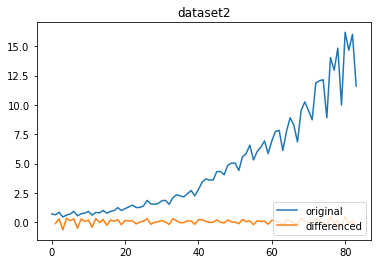

In [11]:
plt.title('dataset2')

plt.plot(d2['data'])

plt.plot(d2_log['log_diff'])
plt.legend(["original", "differenced"], loc ="lower right") 

acf and pacf of original data

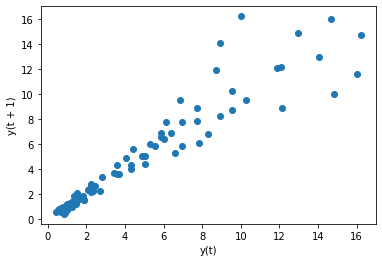

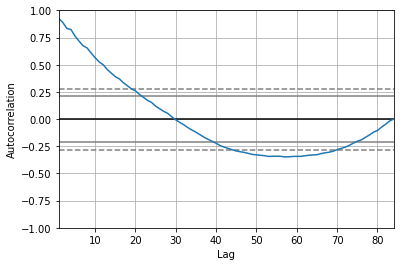

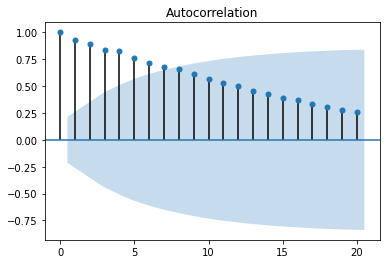

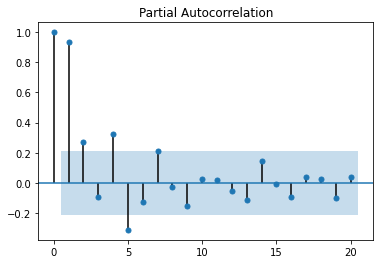

In [ ]:
lag_plot(d2['data'])
pyplot.show()
autocorrelation_plot(d2['data'])
pyplot.show()
plot_acf(d2['data'],lags = 20)
pyplot.show()
plot_pacf(d2['data'],lags = 20)
pyplot.show()

checking for seasonality

<Figure size 432x288 with 0 Axes>

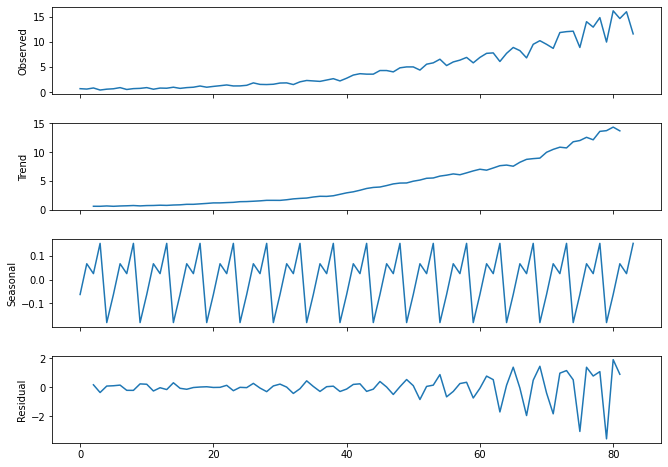

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(d2['data'], model='additive', freq=5)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(10,7)

the data is seasonal

acf and pacf of new data

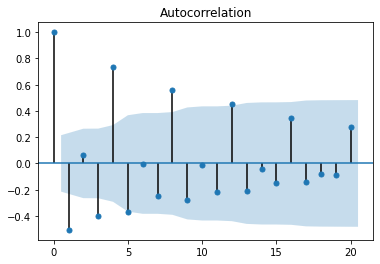

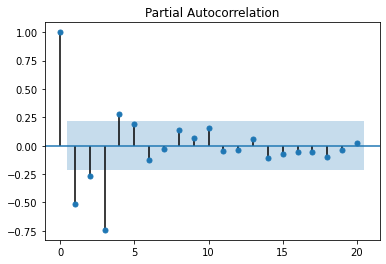

In [12]:
plot_acf(d2_log['log_diff'],lags = 20)
pyplot.show()
plot_pacf(d2_log['log_diff'],lags = 20)
pyplot.show()

from acf and pacf, the order can be determined as (6,1,8)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: 

Test MSE: 0.005
Test RMSE: 0.067
Test R2SCORE: 0.904


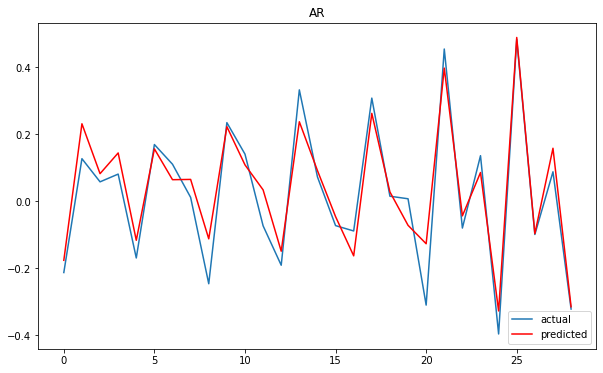

In [15]:
X = d2_log['log_diff'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
preds = []

for t in range(len(test)):
	model = ARIMA(history, order=(6,0,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	preds.append(yhat)
	obs = test[t]
	history.append(obs)


rmse = sqrt(mean_squared_error(test, preds))
mse = mean_squared_error(test,preds)
r2score = r2_score(test,preds)
print('Test MSE: %.3f' % mse)
print('Test RMSE: %.3f' % rmse)
print('Test R2SCORE: %.3f' % r2score)
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
pyplot.plot(test,label = 'actual')
pyplot.plot(preds, color='red',label = 'predicted')

   
ax.legend(loc='lower right')
plt.title('AR')

pyplot.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sta

Test MSE: 0.009
Test RMSE: 0.096
Test R2SCORE: 0.806


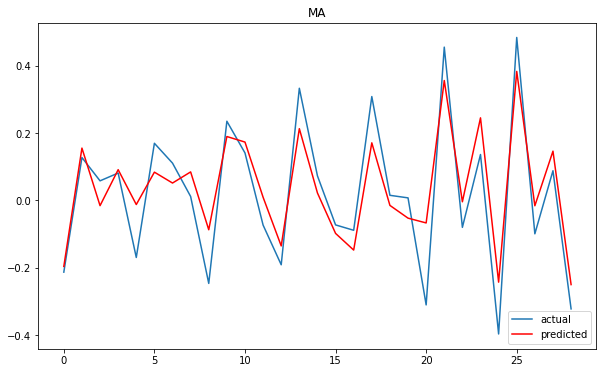

In [16]:
X = d2_log['log_diff'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
preds = []
for t in range(len(test)):
	model = ARIMA(history, order=(0,0,8))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	preds.append(yhat)
	obs = test[t]
	history.append(obs)


rmse = sqrt(mean_squared_error(test, preds))
mse = mean_squared_error(test,preds)
r2score = r2_score(test,preds)
print('Test MSE: %.3f' % mse)
print('Test RMSE: %.3f' % rmse)
print('Test R2SCORE: %.3f' % r2score)

fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
pyplot.plot(test,label = 'actual')
pyplot.plot(preds, color='red',label = 'predicted')

   
ax.legend(loc='lower right')
plt.title('MA')

pyplot.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

Test MSE: 0.007
Test RMSE: 0.081
Test R2SCORE: 0.860


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


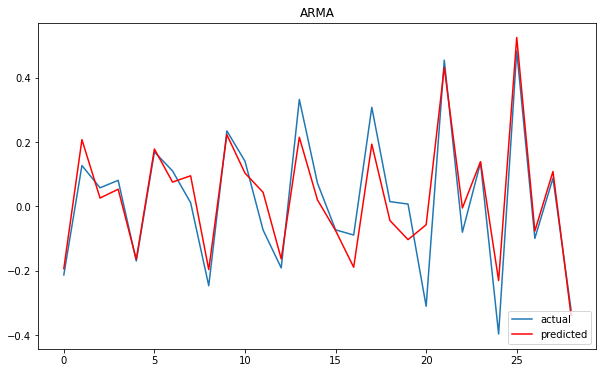

In [17]:
X = d2_log['log_diff'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
preds = []
for t in range(len(test)):
	model = ARIMA(history, order=(6,0,8))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	preds.append(yhat)
	obs = test[t]
	history.append(obs)


rmse = sqrt(mean_squared_error(test, preds))
mse = mean_squared_error(test,preds)
r2score = r2_score(test,preds)
print('Test MSE: %.3f' % mse)
print('Test RMSE: %.3f' % rmse)
print('Test R2SCORE: %.3f' % r2score)

fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
pyplot.plot(test,label = 'actual')
pyplot.plot(preds, color='red',label = 'predicted')

   
ax.legend(loc='lower right')
plt.title('ARMA')

pyplot.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: 

Test MSE: 0.007
Test RMSE: 0.085
Test R2SCORE: 0.846


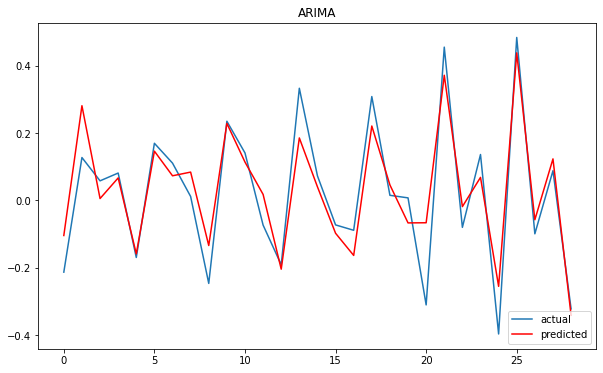

In [65]:
X = d2_log['log_diff'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
preds = []
for t in range(len(test)):
	model = ARIMA(history, order=(6,1,8))
	model_fit = model.fit()
	output = model_fit.forecast() 
	yhat = output[0]
	preds.append(yhat)
	obs = test[t]
	history.append(obs)


rmse = sqrt(mean_squared_error(test, preds))
mse = mean_squared_error(test,preds)
r2score = r2_score(test,preds)
print('Test MSE: %.3f' % mse)
print('Test RMSE: %.3f' % rmse)
print('Test R2SCORE: %.3f' % r2score)

fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()
pyplot.plot(test,label = 'actual')
pyplot.plot(preds, color='red',label = 'predicted')

   
ax.legend(loc='lower right')
plt.title('ARIMA')

pyplot.show()

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
best_model = SARIMAX(d2['data'], order=(0, 1, 2), seasonal_order=(0, 1, 2, 4)).fit(dis=-1)
print(best_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                              data   No. Observations:                   84
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 4)   Log Likelihood                 -46.777
Date:                           Thu, 18 Mar 2021   AIC                            103.555
Time:                                   19:06:36   BIC                            115.402
Sample:                                        0   HQIC                           108.301
                                            - 84                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8617      0.112     -7.692      0.000      -1.081      -0.642
ma.L2          0.1191      0.134      0.889

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


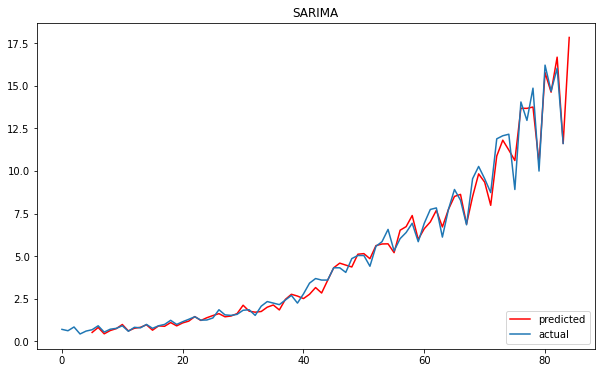

In [40]:
d2['arima_model'] = best_model.fittedvalues
d2['arima_model'][:4+1] = np.NaN
forecast = best_model.predict(start=d2.shape[0], end=d2.shape[0])
forecast = d2['arima_model'].append(forecast)
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()

plt.plot(forecast, color='r', label='predicted')

plt.plot(d2['data'], label='actual')
ax.legend(loc='lower right')
plt.title('SARIMA')
plt.show()





   

